<a href="https://colab.research.google.com/github/Nellaapriliaa/MachineLearningTasks/blob/main/TUGAS%2011/LeNet/Nella_Aprilia_1103210185_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import library yang diperlukan**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


**Persiapkan Data**


In [3]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalisasi data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encoding target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 6s 0us/step


**Membangun dengan Model LeNet**

In [4]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))


**Kompilasi dan Latih Model**

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
391/391 [==============================] - 43s 104ms/step - loss: 1.7257 - accuracy: 0.3656 - val_loss: 1.5185 - val_accuracy: 0.4444
Epoch 2/10
391/391 [==============================] - 33s 84ms/step - loss: 1.4468 - accuracy: 0.4748 - val_loss: 1.3903 - val_accuracy: 0.5007
Epoch 3/10
391/391 [==============================] - 35s 91ms/step - loss: 1.3341 - accuracy: 0.5200 - val_loss: 1.2970 - val_accuracy: 0.5305
Epoch 4/10
391/391 [==============================] - 34s 86ms/step - loss: 1.2552 - accuracy: 0.5503 - val_loss: 1.2819 - val_accuracy: 0.5374
Epoch 5/10
391/391 [==============================] - 35s 90ms/step - loss: 1.1942 - accuracy: 0.5742 - val_loss: 1.2230 - val_accuracy: 0.5637
Epoch 6/10
391/391 [==============================] - 33s 83ms/step - loss: 1.1562 - accuracy: 0.5885 - val_loss: 1.2147 - val_accuracy: 0.5601
Epoch 7/10
391/391 [==============================] - 33s 84ms/step - loss: 1.1067 - accuracy: 0.6088 - val_loss: 1.2195 - val_accuracy

**Evaluasi Model**

In [6]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 1.104810357093811
Test accuracy: 0.6101999878883362


**Visualisasi Hasil Pelatihan**


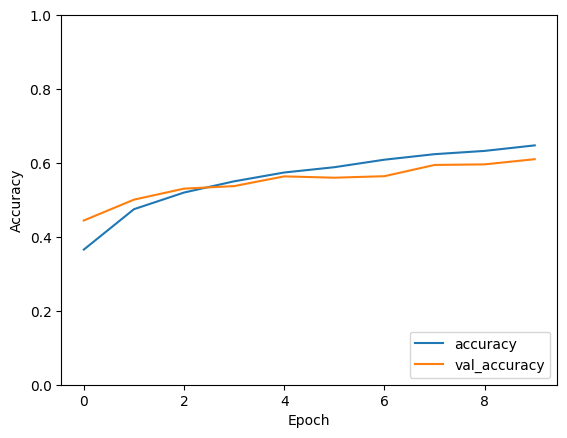

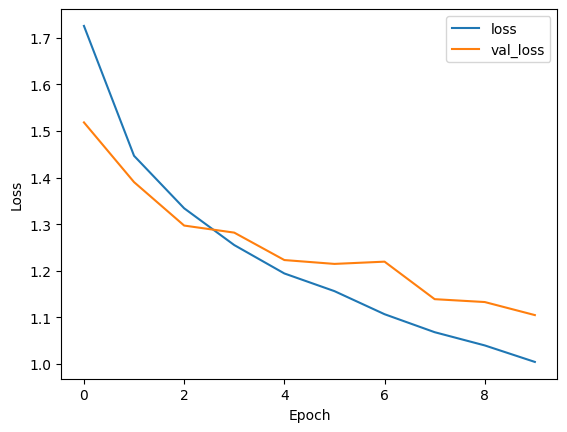

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
